In [1]:
from _shared import *

## Задача  1. Разбиение на страты

Предположим, у нас есть набор признаков, которые вычисляются независимо от эксперимента. Используя эти признаки, нужно разбить объекты на страты так, чтобы дисперсия стратифицированного среднего была минимальна и доля каждой страты была не менее 5% от всех данных.

Данные разбиты на 2 части. Первая часть доступна для исследования по ссылке `stratification_task_data_public.csv`. Решение будет проверяться на второй части данных.
Значения в столбцах:
- `x1, ..., x10` — признаки, которые можно использовать для вычисления страт.
- Значения в столбце y — измерения, по которым будет вычисляться целевая метрика эксперимента.

Подходы формирования страт можно посмотреть в блокноте.

Дисперсия должна не превышать 50,000.

In [11]:
import pandas as pd
import numpy as np


def get_strats(df_features):
    """Возвращает страты объектов.

    :param df_features (pd.DataFrame): таблица с признаками x1,...,x10
    :return (list | np.array | pd.Series): список страт объектов размера len(df).
    """
    pass

In [9]:
filename = 'stratification_task_data_public.csv'

# df = read_from_database(filename)
df = pd.read_csv('./data/{}'.format(filename))
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.869,30,33.8,0,1,0.2,1992,1,1,1,1903
1,0.759,27,21.7,2,0,3.5,1995,1,1,2,1313
2,0.456,29,37.6,2,0,3.1,1993,0,0,0,1484
3,0.060,35,27.5,2,0,4.7,1988,0,0,1,1188
4,0.939,19,30.7,0,0,3.6,2003,1,1,2,842


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      10000 non-null  float64
 1   x2      10000 non-null  int64  
 2   x3      10000 non-null  float64
 3   x4      10000 non-null  int64  
 4   x5      10000 non-null  int64  
 5   x6      10000 non-null  float64
 6   x7      10000 non-null  int64  
 7   x8      10000 non-null  int64  
 8   x9      10000 non-null  int64  
 9   x10     10000 non-null  int64  
 10  y       10000 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 859.5 KB


In [7]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000
mean,0.500503,29.973700,29.995710,0.999700,0.407400,4.000810,1992.526400,0.650500,0.6030,1.994800,1367.874000
std,0.289098,4.598578,6.958865,0.820955,0.491375,3.981776,4.622644,0.476836,0.4893,1.406546,257.056598
min,0.000000,12.000000,3.100000,0.000000,0.000000,0.000000,1974.000000,0.000000,0.0000,0.000000,325.000000
25%,0.249000,27.000000,25.400000,0.000000,0.000000,1.100000,1989.000000,0.000000,0.0000,1.000000,1198.000000
50%,0.498000,30.000000,30.100000,1.000000,0.000000,2.700000,1993.000000,1.000000,1.0000,2.000000,1373.000000
75%,0.752000,33.000000,34.700000,2.000000,1.000000,5.600000,1996.000000,1.000000,1.0000,3.000000,1541.000000
max,1.000000,49.000000,58.000000,2.000000,1.000000,37.400000,2011.000000,1.000000,1.0000,8.000000,2249.000000


In [12]:
df_features = df.drop('y', axis=1)
df['strat'] = get_strats(df_features)
# пример вычисления дисперсии смотри в прикреплённом jupyter-notebook

Не сводятся ли формулы обычного среднего и стратфицированного среднего к одному в случае стратифицированного сэмплирования?

> Во-первых, при стратифицированном семплировании оценка стратифицированного среднего равна оценке обычного (выборочного) среднего.

[Стратификация. Как разбиение выборки повышает чувствительность A/B теста](https://habr.com/ru/companies/X5Tech/articles/596279/#:~:text=%D0%92%D0%BE%2D%D0%BF%D0%B5%D1%80%D0%B2%D1%8B%D1%85%2C%20%D0%BF%D1%80%D0%B8%20%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%BE%D0%BC%20%D1%81%D0%B5%D0%BC%D0%BF%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B8%20%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%20%D1%81%D1%82%D1%80%D0%B0%D1%82%D0%B8%D1%84%D0%B8%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE%20%D1%80%D0%B0%D0%B2%D0%BD%D0%B0%20%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B5%20%D0%BE%D0%B1%D1%8B%D1%87%D0%BD%D0%BE%D0%B3%D0%BE%20(%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D0%BE%D0%B3%D0%BE)%20%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B3%D0%BE.)

Но тогда почему [Александр Сахнов](https://youtu.be/QiRJM1EPwsQ?t=1351) говорит, что "в некоторых случаях не будет контролироваться ошибка I рода"?
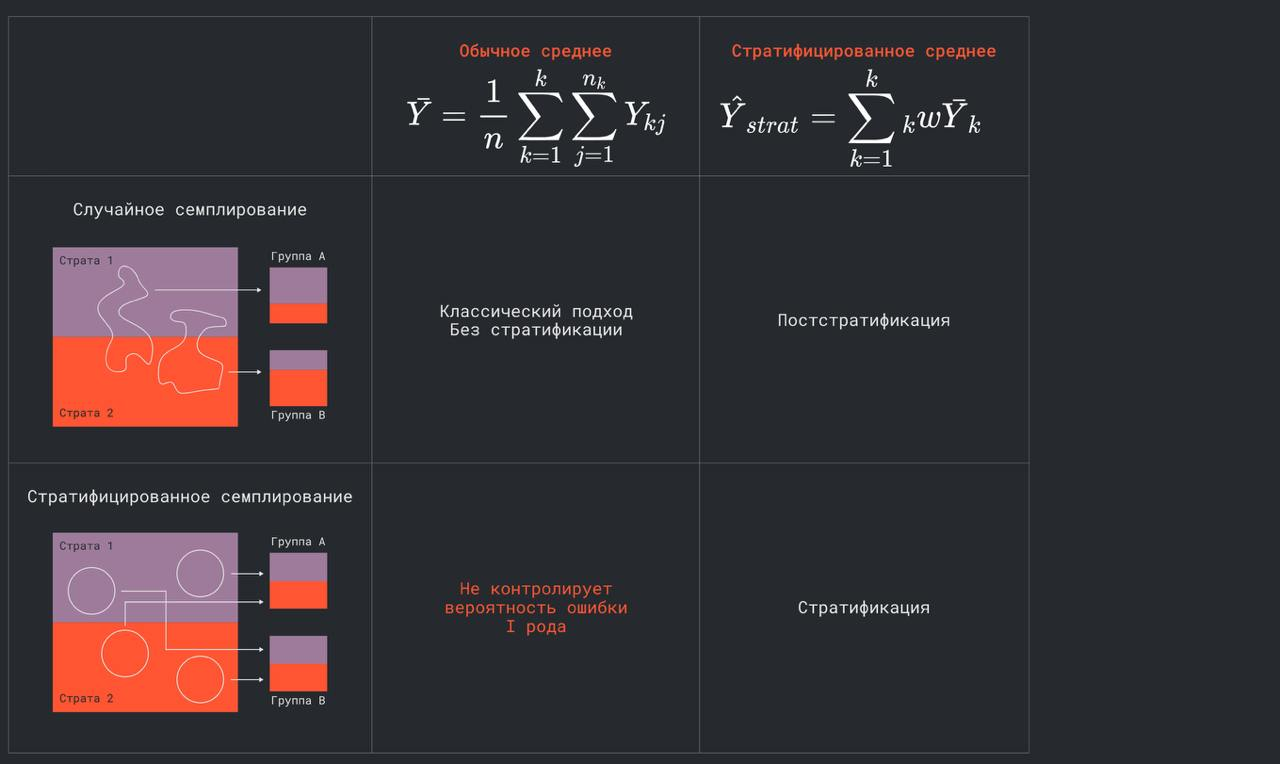

Разницы большой нет: и правда, раз уж они дают один теоретический результат и мы уже построили систему сплитования, то и сэплированное среднее рассчитать не должно составить труда.

Но всё же...
